In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
salary_train = pd.read_csv("/content/SalaryData_Train.csv")
salary_test = pd.read_csv("/content/SalaryData_Test.csv")

In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
# Creating a list for categorical data
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [11]:
from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing

number = LabelEncoder()
for i in string_columns:
    salary_train[i]= number.fit_transform(salary_train[i])
    salary_test[i]=number.fit_transform(salary_test[i])

In [12]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [13]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


**Exploratory Data Analysis (EDA)**

In [14]:
salary_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
workclass,30161.0,2.199330,0.953940,0.0,2.0,2.0,2.0,6.0
education,30161.0,10.333610,3.812260,0.0,9.0,11.0,12.0,15.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
maritalstatus,30161.0,2.580087,1.498018,0.0,2.0,2.0,4.0,6.0
occupation,30161.0,5.959849,4.029633,0.0,2.0,6.0,9.0,13.0
relationship,30161.0,1.418322,1.601361,0.0,0.0,1.0,3.0,5.0
race,30161.0,3.678592,0.834721,0.0,4.0,4.0,4.0,4.0
sex,30161.0,0.675707,0.468118,0.0,0.0,1.0,1.0,1.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0


In [15]:
salary_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
workclass,15060.0,2.214874,0.966422,0.0,2.0,2.0,2.0,6.0
education,15060.0,10.272377,3.826251,0.0,9.0,11.0,12.0,15.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
maritalstatus,15060.0,2.595286,1.505336,0.0,2.0,2.0,4.0,6.0
occupation,15060.0,5.989044,4.020113,0.0,2.0,6.0,9.0,13.0
relationship,15060.0,1.401394,1.588954,0.0,0.0,1.0,3.0,5.0
race,15060.0,3.683665,0.827630,0.0,4.0,4.0,4.0,4.0
sex,15060.0,0.673772,0.468848,0.0,0.0,1.0,1.0,1.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0


In [16]:
salary_train.shape

(30161, 14)

In [17]:
salary_test.shape

(15060, 14)

In [18]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
corr = salary_train.corr()

<AxesSubplot:>

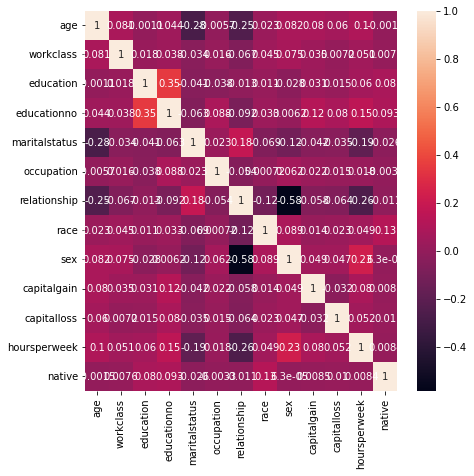

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

In [23]:
colnames = salary_train.columns
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix
sgnb = GaussianNB()
smnb = MultinomialNB()

**Gaussian Naive Bayes**

In [25]:
spred_gnb = sgnb.fit(trainX,trainY).predict(testX)
confusion_matrix_GNB = confusion_matrix(testY,spred_gnb)
confusion_matrix_GNB

array([[10759,   601],
       [ 2491,  1209]])

In [26]:
print("Accuracy",metrics.accuracy_score(testY,spred_gnb))

Accuracy 0.7946879150066402


**Multinomial naive Bayes**

In [27]:
spred_mnb = smnb.fit(trainX,trainY).predict(testX)
confusion_matrix_MNB = confusion_matrix(testY,spred_mnb)
confusion_matrix_MNB

array([[10891,   469],
       [ 2920,   780]])

In [28]:
print("Accuracy",metrics.accuracy_score(testY,spred_mnb))

Accuracy 0.7749667994687915
